# SMU Master of Science (Economics) Programming Workshop in Python


## Introduction
In today's class, we will be learning more about plotting with Python. The key libraries used in this section are [Matplotlib](https://matplotlib.org/) and [Seaborn](https://seaborn.pydata.org/).

---

### Plotting

There are many different kinds of plots: line plots, histograms, 3D plots, violin plots, bar charts, pie charts, scatterplots and heatmaps. Knowing how to use plots effectively can help you to explain certain phenomena in a much clearer manner. 

Consider the following questions you are trying to answer:

Suppose we are trying to find out the relationship between how much a pair of jeans cost, and how long they last, and we have some data. What is the most effective way to plot them? One might suggest the use of a scatterplot, as it is the best way to plot the relationship between 2 numeric variables.

What if one is interested in how GDP growth changes over time? One might argue that the simple line plot works best for viewing temporal relationships. 

Finally, suppose you are interested in whether certain types of securities, such as equities and REITs, yield a higher return than other types of ssecurities, such as bonds.

One way to do so will be to use a lineplot, or a bar chart to illustrate this.

In this section, we'll have a somewhat informal discussion about plots, and attempt to answer these questions: 

1. Why do we need plots?
2. How do we use them effectively?
3. How do we do it in Python?

Once again, we will be learning plotting using an application-based approach. There are 2 examples which we will be exploring in much detail, examples which you should be familiar with by now: the Titanic dataset from Kaggle and the MovieLens dataset from GroupLens.

---

### Data Plotting with Titanic
We begin by importing the dataset. 

This can be achieved using the functions, `import` and `pd.read_csv`.

In [1]:
# pandas and numpy are used for data manipulation, cleaning and processing
import pandas as pd
import numpy as np

# Seaborn and matplotlib are used for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

# style allows us to change the format that matplotlib uses to plot
style.use('fivethirtyeight')

# This plots everything inside jupyter
%matplotlib inline

In [2]:
dat = pd.read_csv('data/titanic/train.csv')

We can start by taking a closer look at the dataset. Recall that the `head()` method returns the first 5 observations of the dataset, while the `describe()` method provides the summary statistics of each variable in the dataset.

In [3]:
dat.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dat.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Turja, Miss. Anna Sofia",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


#### Histograms: Plotting Numerical (non-continuous) Features

Note that there are many variables in the dataset, allowing for many different hypotheses to be tested by means of plotting. Let's begin with the Survived variable. What percentage of the passengers on the Titanic survived? We can use a histogram to show that - we can use the `plt.hist()` function:

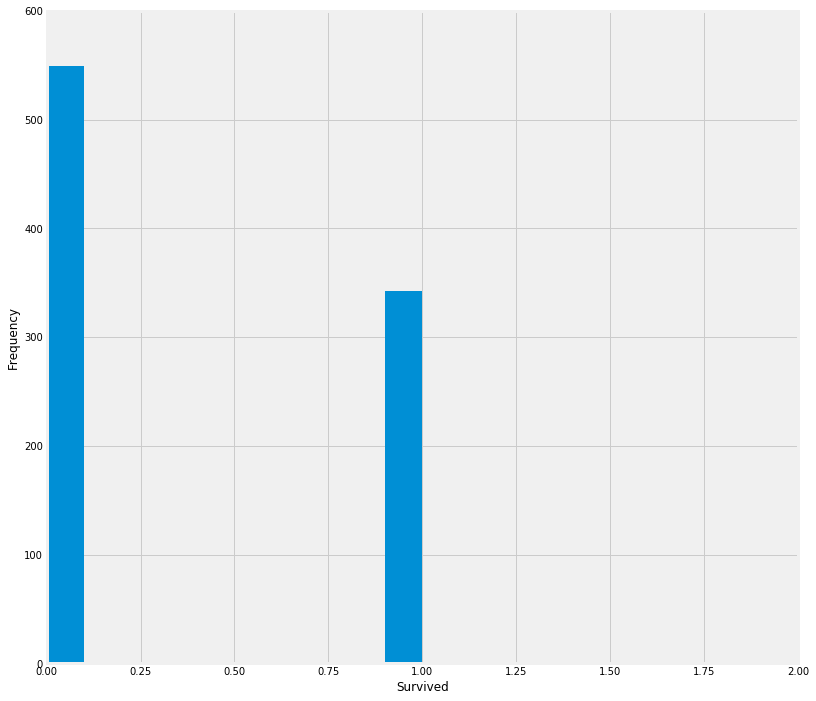

In [6]:
plt.figure(figsize=(12, 12))

# Hist counts the number of times the Survived variables takes on a value of 0 or 1
plt.hist(dat['Survived'])

# Put x and y labels on the plot
plt.xlabel('Survived')
plt.ylabel('Frequency')

# Put x and y limits, restrict x limit to 0 and 2 since Survived = {0, 1}
plt.xlim([0, 2])
plt.ylim([0, 600])

plt.show()

That was a poor use of a plot, since we could always use the method, `mean` to find out the mean survival rate. In addition, there aren't any interesting hypotheses to test based on this observation alone. That said, this is one way of showing your audience what you are trying to say.

#### Functions:

Without further ado, let's take a closer look at the previous code chunk, and dissect what's happening:

`plt.figure(figsize=(20, 10))` alters the figure size to fill the whole screen. The first coordinate represents how wide the image is, and the second coordinate represents how tall you want the image to be.

`plt.hist()` takes a series as an argument and returns the histogram. In our case, since "Survived" only has 2 values (0 and 1), it returns a histogram with 2 unique bins.

`plt.show()` starts an event loop, looks for all currently active figure objects, and opens one or more interactive windows that display your figure or figures i.e. it "shows" the plot.

---

Let's take a closer look at the `plt.hist()` function. Recall that we can use the '?' feature in Jupyter.

In [7]:
?plt.hist

1. Histograms for numerical but non-continuous features
2. Countplots are histograms for categorical features

#### Countplots: Histograms for Categorical Variables

Apart from a histogram, there are many other ways one can use to plot relationships. We can use a countplot (`sns.countplot` from seaborn) to plot the count the number of observations for categorical variables, such as the 'Embarked' and 'Pclass' variable.

In addition, we use the function, `plt.subplot` to tell Python and MatPlotLib that we want to have more than just 1 plot. Note the first 2 arguments of `plt.subplot` refers to the "height" and "width" of the plots - since we intend to have 4 plots, I decided to have a 2x2 layout.

What if you wanted to have 2 plots (side by side)? What would be the appropriate arguments for `plt.subplot`?

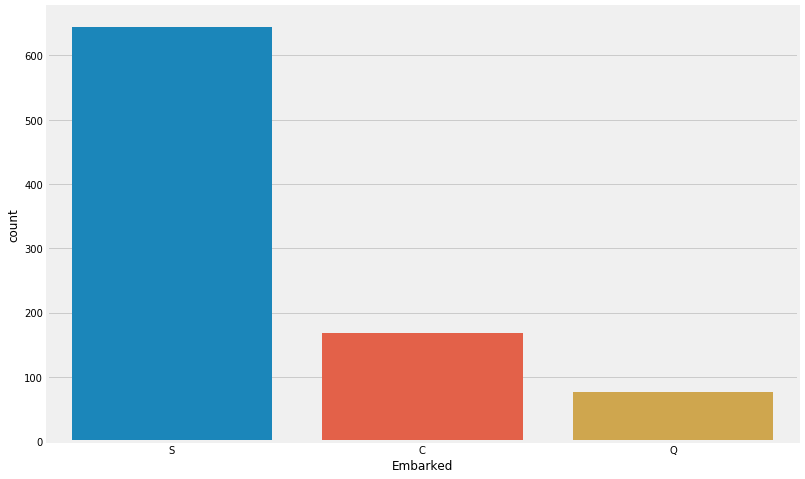

In [11]:
plt.figure(figsize=(12,8))

sns.countplot(dat['Embarked'])

plt.savefig("MyFavoriteFigure.jpg")

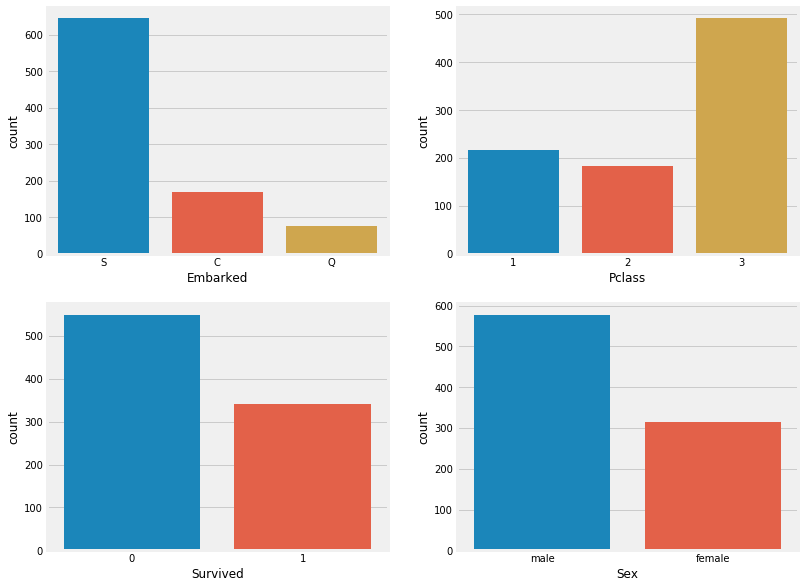

In [12]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.countplot(dat['Embarked'])

plt.subplot(2, 2, 2)
sns.countplot(dat['Pclass'])

plt.subplot(2, 2, 3)
sns.countplot(dat['Survived'])

plt.subplot(2, 2, 4)
sns.countplot(dat['Sex'])

plt.savefig('coolplots.png') # plt.savefig saves the current figure to an image, called "coolplots.jpg" on your local drive
plt.show()

#### Scatterplots: Plotting relationship between 2 numerical variables
Sometimes, we are interested in the relationship between 2 numerical features, for example Age and Fare, To do so, we can use a scatterplot (`plt.scatter` from matplotlib) to plot this relationship. 

In addition, we can use the `plt.xlabel` and `plt.ylabel` functions to label the x and y-axes. Also, we can use the `plt.title` function to label the title of the plot.

In [17]:
?plt.scatter

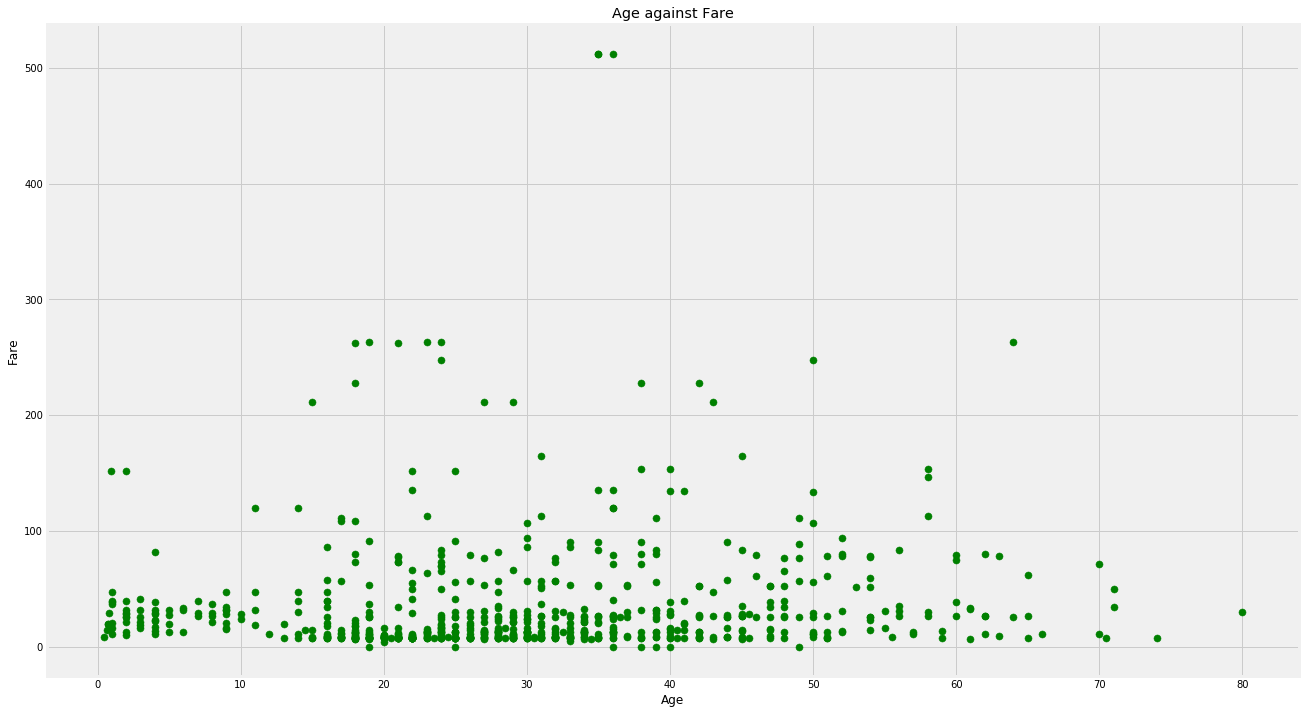

In [23]:
plt.figure(figsize=(20, 12))
# argument 1 is for x-axis, argument 2 is for y-axis, s: size of marker
plt.scatter(dat['Age'], dat['Fare'], s=50, marker='o', c='g')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age against Fare')
plt.show()

Is there a relationship between Age and Fare? We can't really tell with this graph. However, it turns out that we can change the code to add a best fit line into the scatter plot, using seaborn's regression plot (`sns.regplot`):

In [25]:
?sns.regplot

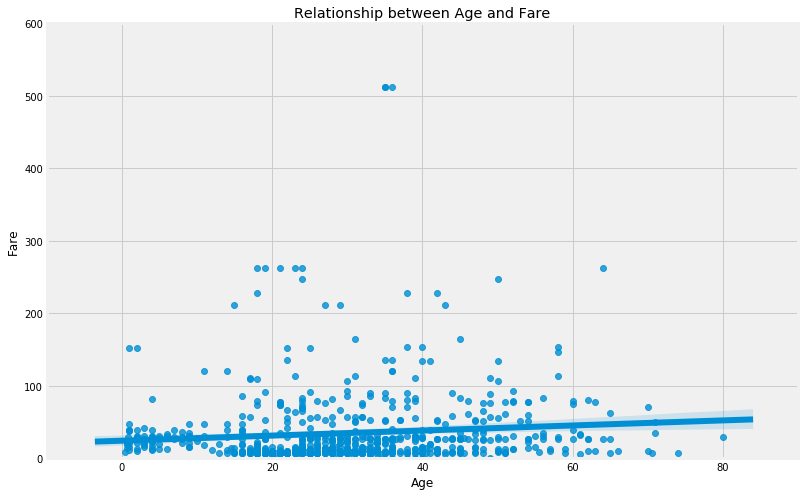

In [24]:
plt.figure(figsize=(12, 8))

sns.regplot(x=dat['Age'], y=dat['Fare'])

plt.xlim([-10, 90])
plt.ylim([0, 600])

plt.title('Relationship between Age and Fare')
plt.show()

There seems to be a really weak relationship between the two variables. Interestingly, the regression plot yields the 95% confidence interval for that regression.

### Arguments for Plots

This section is dedicated to the various arguments we could include when plotting:

1. `plt.figure` creates a new figure, and accepts arguments such as figure size, resolution of the figure etc.
2. `plt.xlabel` creates the label for the x-axis
3. `plt.ylabel` creates the label for the y-axis
4. `plt.title` creates the title for the plot
5. `plt.xlim` sets the "x" limits of the current axes
6. `plt.ylim` sets the "y" limits of the current axes
7. `plt.legend` creates a box of the legend (to be used in conjunction with "label" in plots)

We will use the following examples to illustrate how you can use some of these arguments to "beautify" your plots.


#### Distribution Plots: Histogram Plots for Continuous Variables
Suppose we are interested in the relationship between a categorical variable and a numerical variable, say Age and Survival. 

We want to explore how Age affects Survival rate: how can we do so? One way to do so is to plot 2 distribution functions; 1 for those who survived and 1 for those who did not. We can use the kernel density plot from seaborn (`sns.distplot`) to do so:

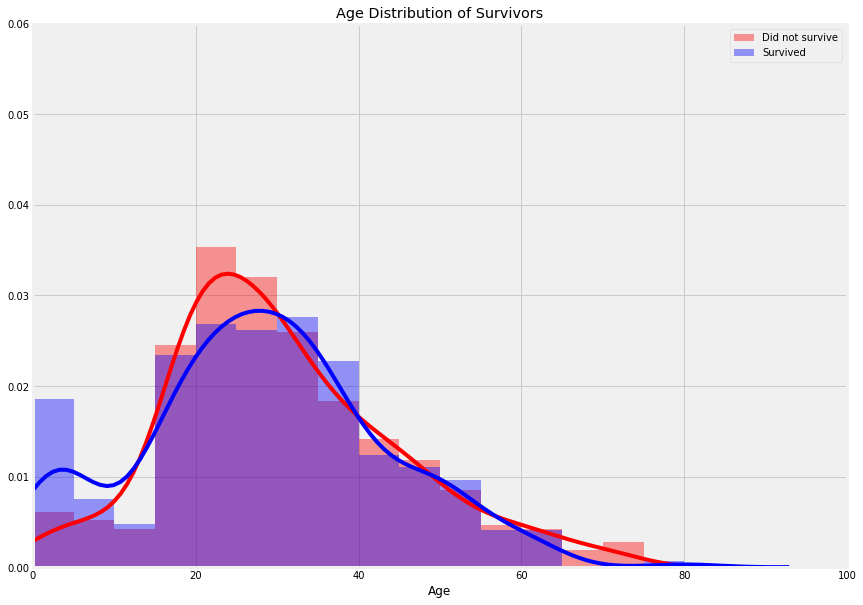

In [27]:
plt.figure(figsize=(13, 10))
# first arg - variable of interest
sns.distplot(dat[dat.Survived == 0]['Age'].dropna(), bins=range(0,81,5), color = 'red', label="Did not survive")
sns.distplot(dat[dat.Survived == 1]['Age'].dropna(), bins=range(0,81,5), color = 'blue', label="Survived")

# Sets "x" limits, "y" limits and title of the plot
plt.ylim([0, 0.06])
plt.xlim([0, 100])
plt.legend(loc='upper right')
plt.title('Age Distribution of Survivors')
plt.show()

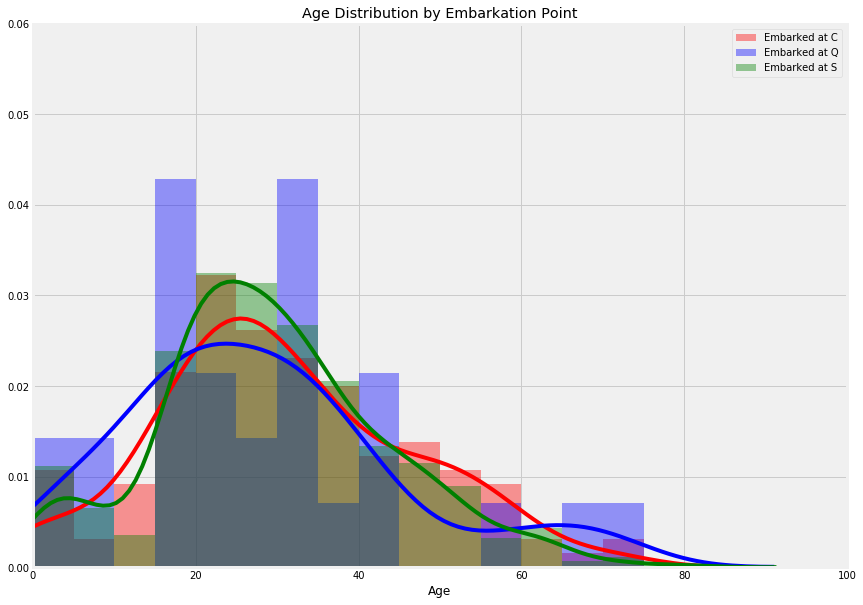

In [28]:
plt.figure(figsize=(13, 10))
# first arg - variable of interest
sns.distplot(dat[dat['Embarked'] == 'C']['Age'].dropna(), bins=range(0,81,5), color = 'red', label="Embarked at C")
sns.distplot(dat[dat['Embarked'] == 'Q']['Age'].dropna(), bins=range(0,81,5), color = 'blue', label="Embarked at Q")
sns.distplot(dat[dat['Embarked'] == 'S']['Age'].dropna(), bins=range(0,81,5), color = 'green', label="Embarked at S")

# Sets "x" limits, "y" limits and title of the plot
plt.ylim([0, 0.06])
plt.xlim([0, 100])
plt.legend(loc='upper right')
plt.title('Age Distribution by Embarkation Point')
plt.show()

One of the observations made here, is that children under the age of 10 are typically more likely to survive than perish. For all other age groups, there are no observable trends.

1. Histograms for Numerical/Integer variables
2. Countplots which are Histograms for Categorical Variables
3. Scatterplots for 2 different numerical/float variables
4. Distribution plots

#### Pairsplot: Exploring Multiple Numerical Features

Given that there are **so many** relationships to explore, how can we fully explore them in detail? One way to do so is to plot the relationships between *any* 2 numeric features in our dataset, and it turns out that there is a very convenient way of doing so. We can use a pairplot.

We can use the function, `sns.pairplot` to plot the relationship between any 2 features across all features in a particular dataset. Note that `sns` stands for seaborn.

/Users/ngbolin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/ngbolin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


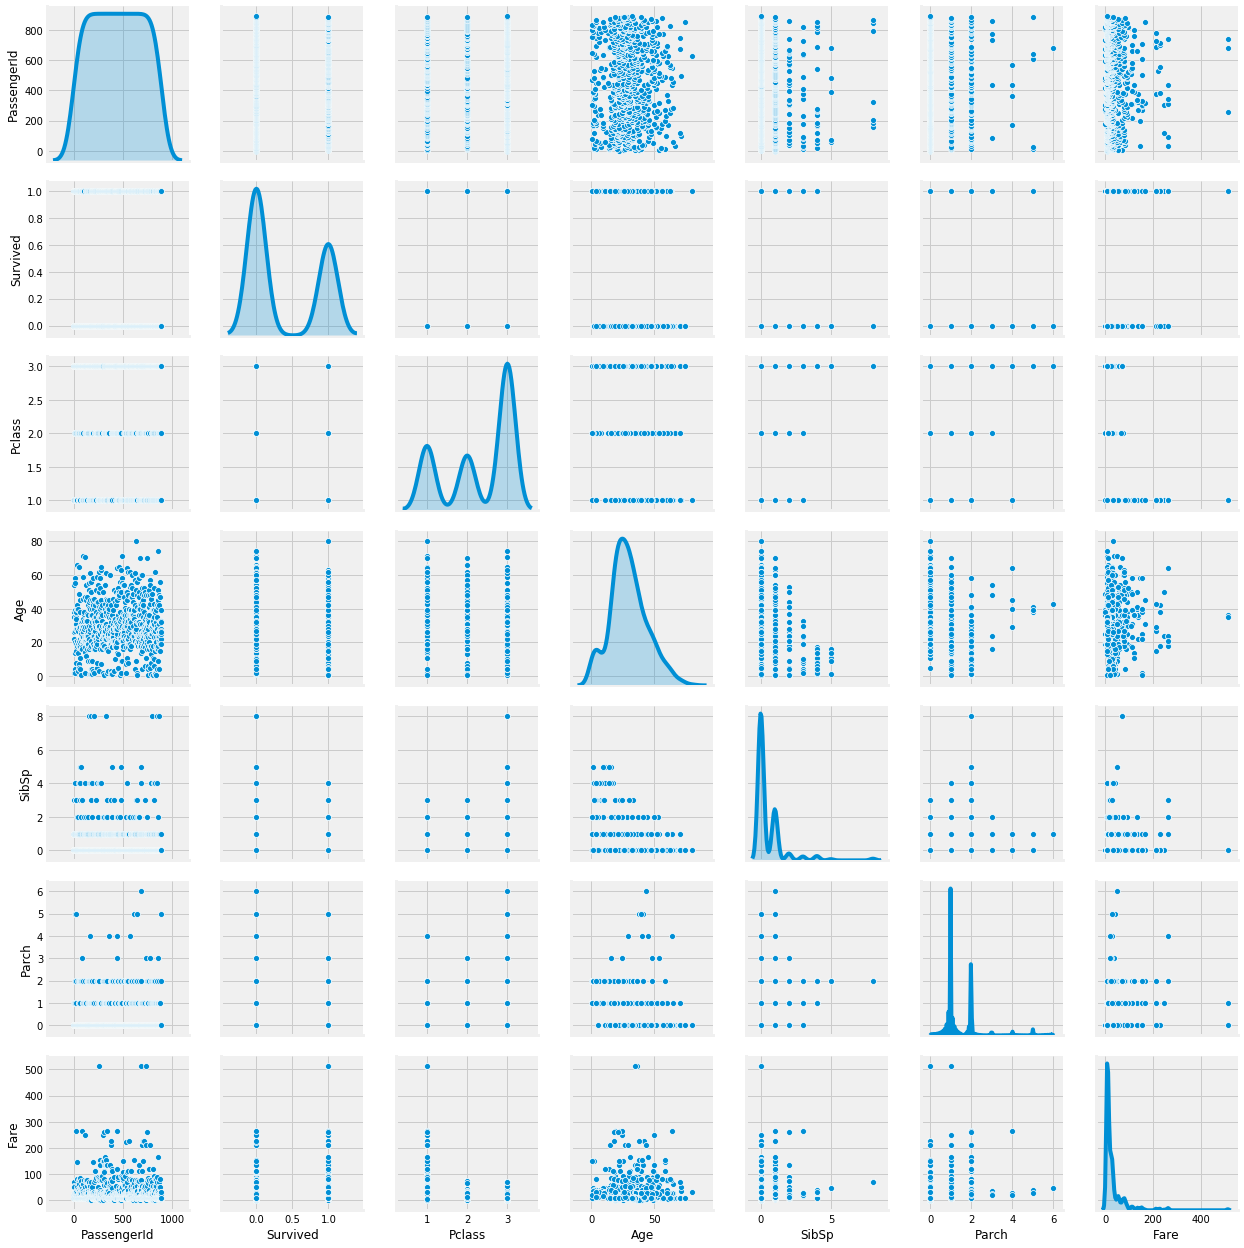

In [29]:
sns.pairplot(dat, diag_kind='kde')
plt.show()

Note that we set the argument, `diag_kind` to "kde" and [KDE](https://en.wikipedia.org/wiki/Kernel_density_estimation) stands for Kernel Density Estimation - a non-parametric way to estimate the probability density function of a random variable. This means that we want the diagonal plots to be the probability density functions of the variables themselves.

---

#### Correlation Plots & Heatmaps: Exploring Correlation Across Multiple Numerical Features

While some of the relationships provided aren't very informative, it gives us a good idea of what we should be looking out for. In addition, we can further explore the underlying relationships in the dataset with a correlation plot (in the form of a heatmap to get a better idea).

In [30]:
dat.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In the following code, we use the "Blues" color map, and set `annot` to True. This means that we want the correlation coefficient to appear on the heatmap.

One downside of the heatmap is that it doesn't really show the relationship between "string" categorical variables, against numerical variables, but this can be circumvented through the use of other plots.

In [75]:
?sns.heatmap

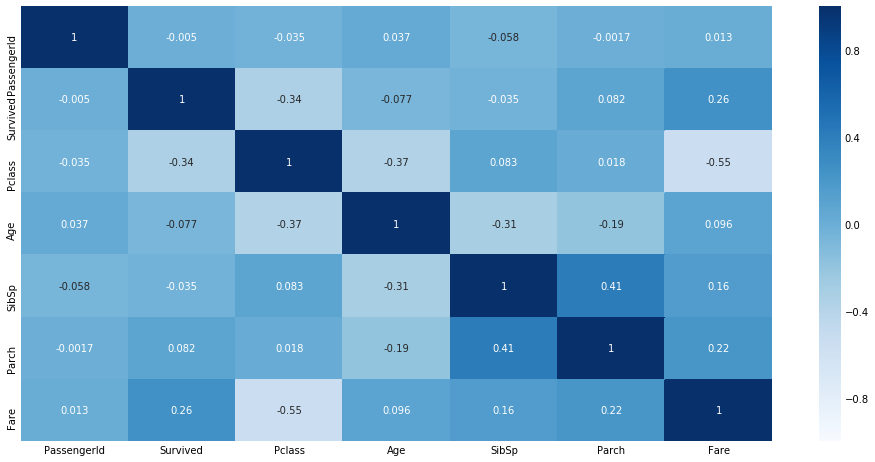

In [38]:
plt.figure(figsize=(15, 8))
sns.heatmap(dat.corr(), cmap='Blues', annot=True, vmin=-1, vmax=1)
plt.show()

From the heatmap above, we note that Fare and Passenger Class are good indicators of predicting who survives. Also, we note that PassengerID is not very indicative of whether or not a passenger survived, but we should have expected that to begin with.

In-class assignment
___

1. Plot the Fare distribution for passengers that survived, and for passengers who died.

1. Plot the Age distribution for passengers that are Male and passengers who are Female.

/Users/ngbolin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


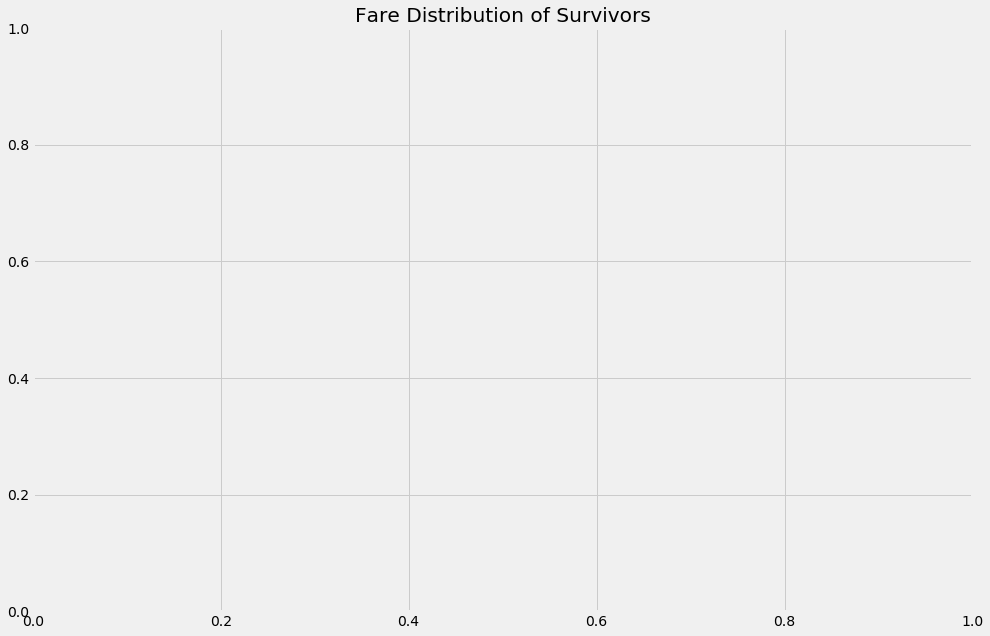

In [15]:
plt.figure(figsize=(15, 10))
## Your code here


# Sets "x" limits, "y" limits and title of the plot
# plt.xlim([-100, 600])
# plt.ylim([0, 0.1])
plt.legend(loc='upper right')
plt.title('Fare Distribution of Survivors')
plt.show()

/Users/ngbolin/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


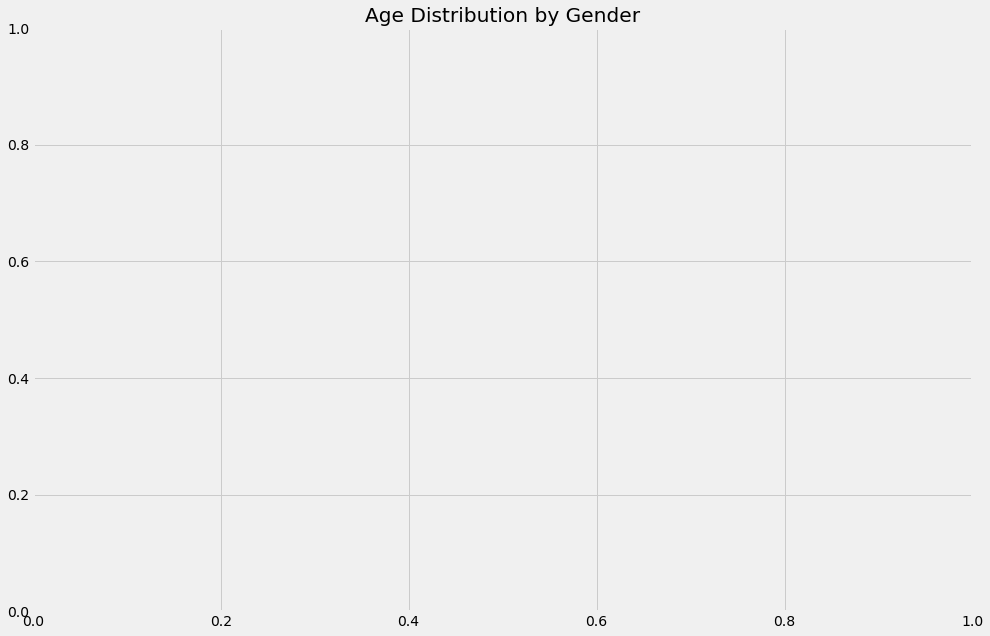

In [16]:
plt.figure(figsize=(15, 10))
## Your code here

# Sets "x" limits, "y" limits and title of the plot
# plt.xlim([-10, 100])
# plt.ylim([0, 0.1])

plt.legend(loc='upper right')
plt.title('Age Distribution by Gender')
plt.show()

#### Violin Plots: Conditional Relationship between Categorical and Numerical Variables

There are many other plots for different purposes, and we will be exploring some of them here. One example is a conditional plot, which plots the relationship of feature 1 against feature 2, controlling for feature 3. 

For example, one might be interested in plotting the relationship between where a passenger Embarked, how much he or she paid and how likely he or she is to survive. In this case, we can use the violin plot (`sns.violinplot`). 

The violin plot function, `sns.violinplot` takes 4 arguments, 2 arguments for the x and y-axes, 1 for the "hue" argument and 1 for the "split" argument. Play around with the arguments to see what each of them does.

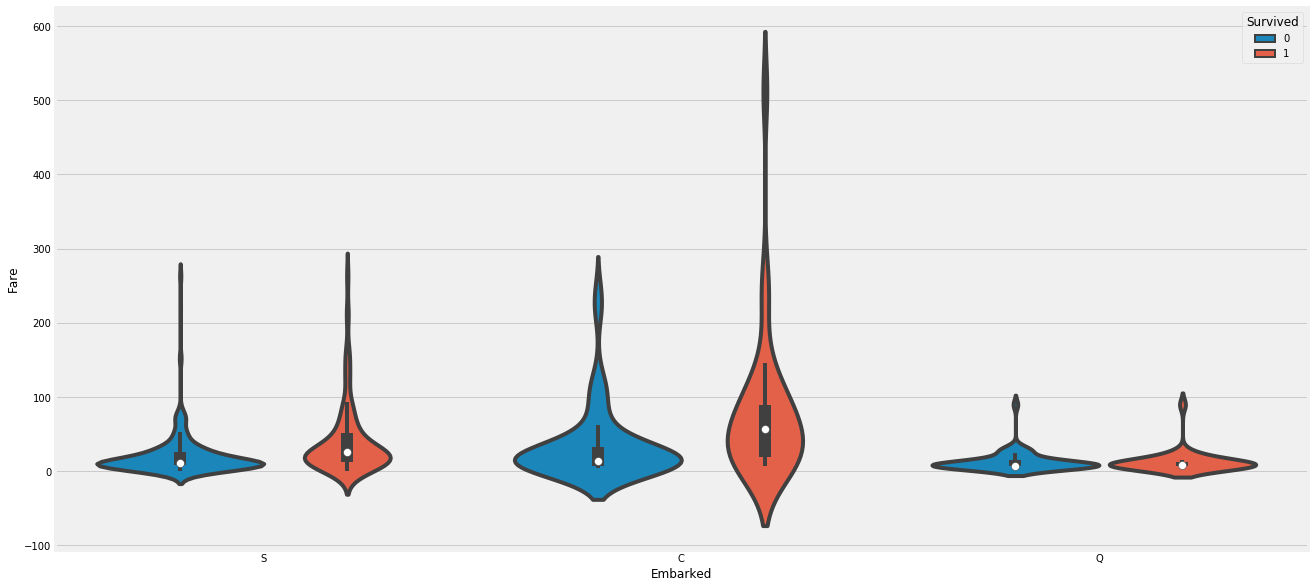

In [39]:
plt.figure(figsize=(20, 10))
sns.violinplot('Embarked', 'Fare', hue = 'Survived', data = dat, split = False)
plt.show()

#### Factor Plots: Relationship between Categorical and Numerical Features

Consider the following hypothesis, where we are trying to plot the relationship between how many Siblings/Spouse (SibSp) one has as well as how many Parents and Children (Parch) one has, and the likelihood of survival. One way of plotting this is to use `catplot`, otherwise known as categorical plot.

In [18]:
?sns.catplot

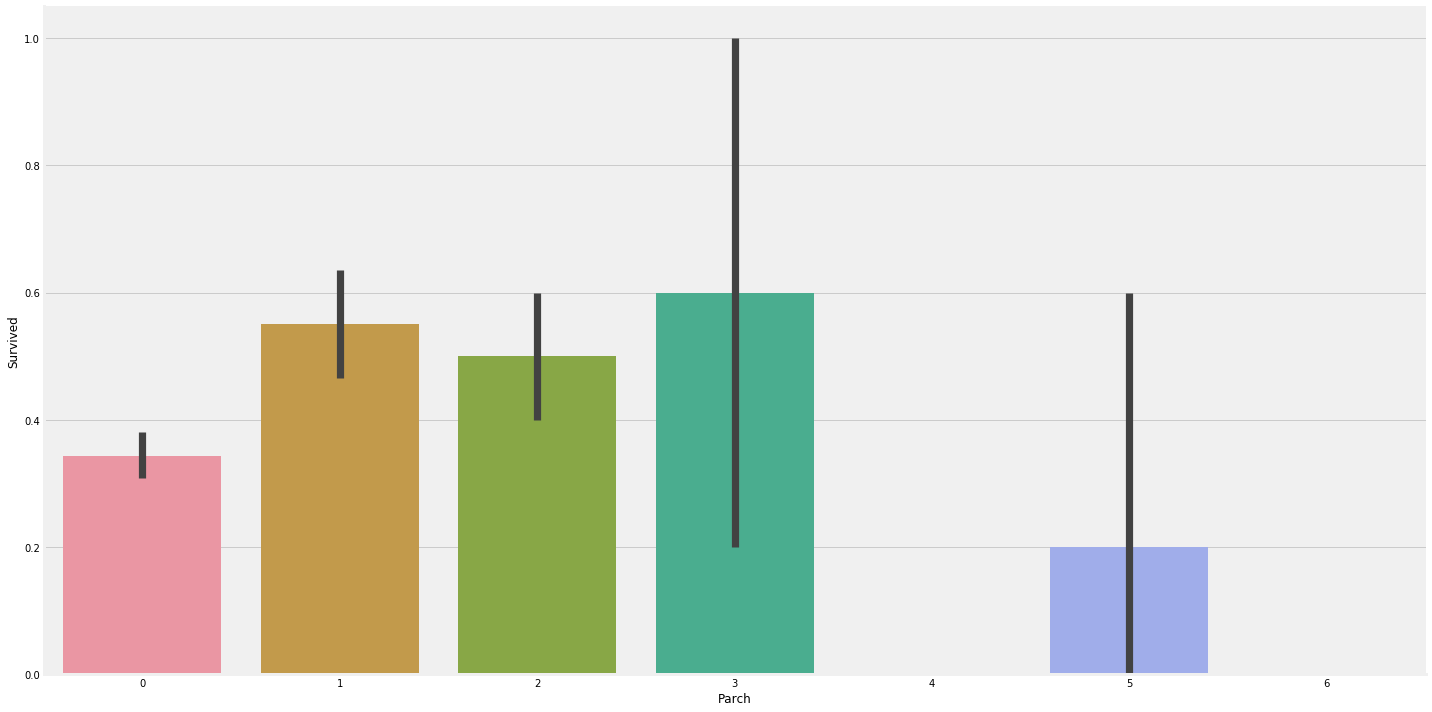

In [40]:
sns.catplot('Parch', 'Survived', kind='bar', data=dat, height=10, aspect=2)
plt.show()

Consider the following:

A data scientist walks up to you, and proposes the following hypothesis:

"I think the ticket type is likely to be correlated with the survival rate. To obtain the ticket type, use the **first character of the 'Ticket' column**. For example, if the Ticket Number is 'AC 2015', the ticket type is 'A', while if the Ticket number is '152385', then the ticket type is '1'." 

Prove or disprove this hypothesis, by means of an appropriate plot. You are required to do some data cleaning, to impute missing values and create a new column, 'TicketType'.

In [20]:
# Step 1: Impute missing values with 'N'
dat['Ticket'].fillna('N', inplace=True)

# Step 2: Get Ticket Type, by obtaining first character of Ticket Number
dat['Ticket_Type'] = dat['Ticket'].apply(...) # please provide your code in the "..."

# Step 3: Plot Ticket Type against Survival Rate
plt.figure(figsize=(20, 12))
# your code here
plt.show()

TypeError: 'ellipsis' object is not callable

### Data Plotting with MovieLens

With whatever knowledge we have acquired on the Titanic dataset, let's move on to the MovieLens dataset. By now, you should be familiar with the 3 different data tables of the dataset, and how to combine these datasets. The following chunks of code should be familiar:

In [ ]:
# Import user data table
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('data/movielens/ml-1m/users.dat', engine='python', sep='::', header=None, names=unames)

# Import ratings table
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('data/movielens/ml-1m/ratings.dat', engine='python', sep='::', header=None, names=rnames)

# Import mnames table
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('data/movielens/ml-1m/movies.dat', engine='python', sep='::', header=None, names=mnames)

In [ ]:
users.head()

In [ ]:
ratings.head()

In [ ]:
movies.head()

Similar to the last's lesson, we will combine the 3 dataframes together. One neat way to do this is the following:

In [ ]:
dat = pd.merge(pd.merge(ratings, users), movies)

In [ ]:
dat.head()

Notice that in the previous lesson, we provided an additional argument, `on`, but in this lesson, we didn't have to. What changed? 

As it turns out, pandas automatically merges the 2 dataframes on the index column if you do not provide the `on` argument. That is, if you're intending to combine on the index, then it doesn't matter whether or not you decide to include the argument. If you have a column to combine on, then you should provide the column name as an argument.

---


Suppose we are interested in the distribution of the average reviews in the dataset. We can use seaborn's `sns.distplot` function. Including the argument, `vertical` rotates the plots so that the y-axis becomes the x-axis, and the x-axis becomes the y-axis. We can apply this to the "rating" variable in the dataset.

In [ ]:
plt.figure(figsize=(15, 8))
# plt.hist(dat['rating'])

sns.distplot(dat['rating'], kde=False, vertical=True)
plt.show()

As it turns out, most of the ratings given by the users are 4-stars ratings. Which movies have the most reviews? Let's find out by means of the plot. Recall that we can use the pd.DataFrame method, `groupby` in conjuction with the method `size` to get the total number of ratings per movie.

In this case, however, we can simply use seaborn's inbuilt `countplot` function. The countplot functions counts the number of occurrence in the dataframe, and plots it. However, there appears to be too many unique films in the dataset. We can include an additional argument, `order` to "restrict" the number of films that we are interested in.

In [ ]:
# The following code returns the top 5 films, along with the number of times they were reviewed
dat['title'].value_counts()[0:5]

In [ ]:
# The following code returns the top 5 films by name
dat.title.value_counts().iloc[:5].index

In [ ]:
plt.figure(figsize=(20, 12))
sns.countplot(x=dat['title'], order=dat.title.value_counts().iloc[:5].index) # value_counts() returns by order the highest counts

In the graph above, we restricted the number of films to be 5, and selected the top 5 films.

---

In-class assignment:

1. Using the same type of plot, plot the 5 least popular films.

In [ ]:
## Your code here

Let's try to plot the top 10 genres.

#### Application - Data Manipulation with Plotting
We can split the each observation on '|', and collect the genres in the form of a list. In what follows, we do so using functional programming.

In [ ]:
dat.genres.apply(lambda x: x.split('|'))[:10]

We then use a for-loop to loop over all observations/entries, and another for-loop to loop over the genres, and use a dictionary to store the counts for each genre.

The complexity associated with the following chunk of code is NM, where N represents the number of observations, and M represents the most number of genre each film could have. As it turns out, N = 1,000,000, and M = 5 => MN = 5,000,000. Python takes about 1 second to compute this operation.

In [ ]:
genre_counts = {}
for genres in dat.genres.apply(lambda x: x.split('|')):
    for genre in genres:
        try: genre_counts[genre] += 1
        except: genre_counts[genre] = 1

In [ ]:
genre_counts

We can then sort by the values in the `genre_counts` dictionary to get the top 10 genres.

In [ ]:
import operator

sorted_genre_counts = sorted(genre_counts.items(), key=operator.itemgetter(1), reverse=True)
sorted_genre_df = pd.DataFrame(sorted_genre_counts[:10], columns=['Genre', 'Counts'])
sorted_genre_df.set_index('Genre', inplace=True)

sorted_genre_df.plot.bar(figsize=(20, 12))

### Preliminary Regular Expressions

In this lesson, we will also be dealing with a not-so-gentle introduction to regular expressions (a gentler introduction will be done next lesson). This is just to give you a flavour as to why regex can do, as a motivation.

Suppose we are interested in the number of films which are produced and shown for each year.

In [ ]:
dat.title.head()

Noting that the year is given in parentheses (round brackets), we can make use of this specific pattern to obtain the year of production. 

### Preliminary Text Analysis; Regular Expressions
Typically, to conduct preliminary text analysis, we import the following libraries:

1. The regular expressions library, `re`
2. The string library, `string`

Regular expressions are a sequence of symbols and characters expressing a string or pattern to be searched for within a longer piece of text. In our case, we are interested in searching for the pattern "(YYYY)" from the Title column.
To do so, we can write a function that does that, and apply it to the column. 

We will be using the function, `re.findall`, which takes 2 arguments, the pattern to search for and the string. The function returns a list, containing all the terms that fit the pattern provided in the string. Understanding that our pattern is likely to be unique, we use `[0]` to tell Python to return the first element of the list returned. What if the pattern is not unique instead? It turns out that we can loop over the list, to find the exact string that matches the patern we are trying to find out.

In [ ]:
import re
import string

def year_from_title(text):
    pattern = '\(([0-9]+)\)'
    return re.findall(pattern, text)[0]

dat.title.apply(lambda x: int(year_from_title(x))).head()

In [ ]:
dat['Year'] = dat.title.apply(lambda x: int(year_from_title(x)))

In [ ]:
plt.figure(figsize=(20, 12))
sns.distplot(dat.Year, kde=False)
plt.show()